# View results after running Delight on DESC-DC2 simulation  in the context of  Vera C. Rubin Obs (LSST) 


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 01 2022


- It is better to run the script **runbychunk_delight_descdc2.py**, before running this notebook : it generate delight files
     
     



- NERSC environnement

Instruction to have a **desc-python** environnement:
- https://confluence.slac.stanford.edu/display/LSSTDESC/Getting+Started+with+Anaconda+Python+at+NERSC


This environnement is a clone from the **desc-python** environnement where package required in requirements can be addded according the instructions here
- https://github.com/LSSTDESC/desc-python/wiki/Add-Packages-to-the-desc-python-environment

We will use the parameter file "tmps/parametersTestRail.cfg".
This contains a description of the bands and data to be used.
In this example we will generate mock data for the ugrizy LSST bands,
fit each object with our GP using ugi bands only and see how it predicts the rz bands.
This is an example for filling in/predicting missing bands in a fully bayesian way
with a flexible SED model quickly via our photo-z GP.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys,os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
from matplotlib.colors import LogNorm

In [3]:
import logging
import coloredlogs
logger = logging.getLogger(__name__)
coloredlogs.install(level='DEBUG', logger=logger,fmt='%(asctime)s,%(msecs)03d %(programname)s %(name)s[%(process)d] %(levelname)s %(message)s')

In [4]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/home/photoz/Intern2022_PhotoZ/railenv/bin/python
3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]


In [5]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

# Initialisation

In [6]:
workdir = "tmp"

# Configuration parameters

- now parameters are generated in a dictionnary

In [7]:
list_of_files = os.listdir(workdir)
list_of_files.remove('data') 
list_of_files.remove('delight_data') 
if '.ipynb_checkpoints' in list_of_files:
    list_of_files.remove('.ipynb_checkpoints')
list_of_configfiles = sorted(list_of_files)

In [8]:
list_of_configfiles

['parametersTest-Sens.cfg',
 'parametersTest.cfg',
 'parametersTest_1.cfg',
 'parametersTest_10.cfg',
 'parametersTest_11.cfg',
 'parametersTest_12.cfg',
 'parametersTest_13.cfg',
 'parametersTest_14.cfg',
 'parametersTest_15.cfg',
 'parametersTest_16.cfg',
 'parametersTest_17.cfg',
 'parametersTest_18.cfg',
 'parametersTest_19.cfg',
 'parametersTest_2.cfg',
 'parametersTest_20.cfg',
 'parametersTest_21.cfg',
 'parametersTest_3.cfg',
 'parametersTest_4.cfg',
 'parametersTest_5.cfg',
 'parametersTest_6.cfg',
 'parametersTest_7.cfg',
 'parametersTest_8.cfg',
 'parametersTest_9.cfg']

In [9]:
NCHUNKS = len(list_of_configfiles)

# Analyze the outputs

## Config parameters

In [10]:
configfileparamdir=workdir

In [11]:
configfilerootname="parametersTest_"

In [12]:
Nconfigfilenum = NCHUNKS-1

In [13]:
Nconfigfilenum 

22

In [14]:
configFileList = []

for idx in np.arange(1,Nconfigfilenum+1):
    configfilename=configfilerootname+str(idx)+".cfg"
    configfullfilename = os.path.join(configfileparamdir,configfilename)
    configFileList.append(configfullfilename)

In [15]:
configFileList

['tmp/parametersTest_1.cfg',
 'tmp/parametersTest_2.cfg',
 'tmp/parametersTest_3.cfg',
 'tmp/parametersTest_4.cfg',
 'tmp/parametersTest_5.cfg',
 'tmp/parametersTest_6.cfg',
 'tmp/parametersTest_7.cfg',
 'tmp/parametersTest_8.cfg',
 'tmp/parametersTest_9.cfg',
 'tmp/parametersTest_10.cfg',
 'tmp/parametersTest_11.cfg',
 'tmp/parametersTest_12.cfg',
 'tmp/parametersTest_13.cfg',
 'tmp/parametersTest_14.cfg',
 'tmp/parametersTest_15.cfg',
 'tmp/parametersTest_16.cfg',
 'tmp/parametersTest_17.cfg',
 'tmp/parametersTest_18.cfg',
 'tmp/parametersTest_19.cfg',
 'tmp/parametersTest_20.cfg',
 'tmp/parametersTest_21.cfg',
 'tmp/parametersTest_22.cfg']

In [16]:
configFileList.remove('tmp/parametersTest_22.cfg')
configFileList

['tmp/parametersTest_1.cfg',
 'tmp/parametersTest_2.cfg',
 'tmp/parametersTest_3.cfg',
 'tmp/parametersTest_4.cfg',
 'tmp/parametersTest_5.cfg',
 'tmp/parametersTest_6.cfg',
 'tmp/parametersTest_7.cfg',
 'tmp/parametersTest_8.cfg',
 'tmp/parametersTest_9.cfg',
 'tmp/parametersTest_10.cfg',
 'tmp/parametersTest_11.cfg',
 'tmp/parametersTest_12.cfg',
 'tmp/parametersTest_13.cfg',
 'tmp/parametersTest_14.cfg',
 'tmp/parametersTest_15.cfg',
 'tmp/parametersTest_16.cfg',
 'tmp/parametersTest_17.cfg',
 'tmp/parametersTest_18.cfg',
 'tmp/parametersTest_19.cfg',
 'tmp/parametersTest_20.cfg',
 'tmp/parametersTest_21.cfg']

# Outputs

## choose single file

In [17]:
idx_sel=15

In [18]:
configdatafilename=configFileList[idx_sel]

In [19]:
params = parseParamFile(configdatafilename, verbose=True)

Input parameter file: tmp/parametersTest_16.cfg
Parameters read:
>  rootDir              ./
>  bands_directory      ./tmp/data/FILTERS
>  bandNames            DC2LSST_u DC2LSST_g DC2LSST_r DC2LSST_i DC2LSST_z DC2LSST_y
>  numCoefs             15
>  bands_fmt            res
>  bands_verbose        True
>  bands_debug          True
>  bands_makeplots      False
>  templates_directory  ./tmp/data/CWW_SEDs
>  sed_fmt              sed
>  lambdaRef            4500.0
>  templates_names      El_B2004a Sbc_B2004a Scd_B2004a SB3_B2004a SB2_B2004a Im_B2004a ssp_25Myr_z008 ssp_5Myr_z008
>  p_t                  [0.27   0.26   0.25   0.069  0.021  0.11   0.0061 0.0079]
>  p_z_t                [0.23 0.39 0.33 0.31 1.1  0.34 1.2  0.14]
>  training_numChunks   1
>  training_paramFile   ./tmp/delight_data/galaxies-gpparams.txt
>  training_catFile     ./tmp/delight_data/galaxies-fluxredshifts.txt
>  training_referenceBand DC2LSST_i
>  training_bandOrder   DC2LSST_u DC2LSST_u_var DC2LSST_g DC2LSST_g_var D

In [20]:
DL = approx_DL()
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)

## Extract posteriors

In [21]:
bandCoefAmplitudes, bandCoefPositions, bandCoefWidths, norms = readBandCoefficients(params)
bandNames = params['bandNames']
numBands, numCoefs = bandCoefAmplitudes.shape
fluxredshifts = np.loadtxt(params['target_catFile'])
fluxredshifts_train = np.loadtxt(params['training_catFile'])
bandIndices, bandNames, bandColumns, bandVarColumns, redshiftColumn,\
            refBandColumn = readColumnPositions(params, prefix='target_')
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
nt = len(sed_names)
f_mod = np.zeros((redshiftGrid.size, nt, len(params['bandNames'])))
for t, sed_name in enumerate(sed_names):
    f_mod[:, t, :] = np.loadtxt(dir_seds + '/' + sed_name + '_fluxredshiftmod.txt')


In [22]:
# Load the PDF files
metricscww = np.loadtxt(params['metricsFile'])
metrics = np.loadtxt(params['metricsFileTemp'])
# Those of the indices of the true, mean, stdev, map, and map_std redshifts.
i_zt, i_zm, i_std_zm, i_zmap, i_std_zmap = 0, 1, 2, 3, 4
i_ze = i_zm
i_std_ze = i_std_zm

pdfs = np.loadtxt(params['redshiftpdfFile'])
pdfs_cww = np.loadtxt(params['redshiftpdfFileTemp'])
pdfatZ_cww = metricscww[:, 5] / pdfs_cww.max(axis=1)
pdfatZ = metrics[:, 5] / pdfs.max(axis=1)
nobj = pdfatZ.size
#pdfs /= pdfs.max(axis=1)[:, None]
#pdfs_cww /= pdfs_cww.max(axis=1)[:, None]
pdfs /= np.trapz(pdfs, x=redshiftGrid, axis=1)[:, None]
pdfs_cww /= np.trapz(pdfs_cww, x=redshiftGrid, axis=1)[:, None]

FileNotFoundError: ./tmp/delight_data/galaxies-redshiftmetrics_16.txt not found.

403 814 564 316 819 634 4 673 639 528 449 74 611 210 553 112 123 438 509 478 

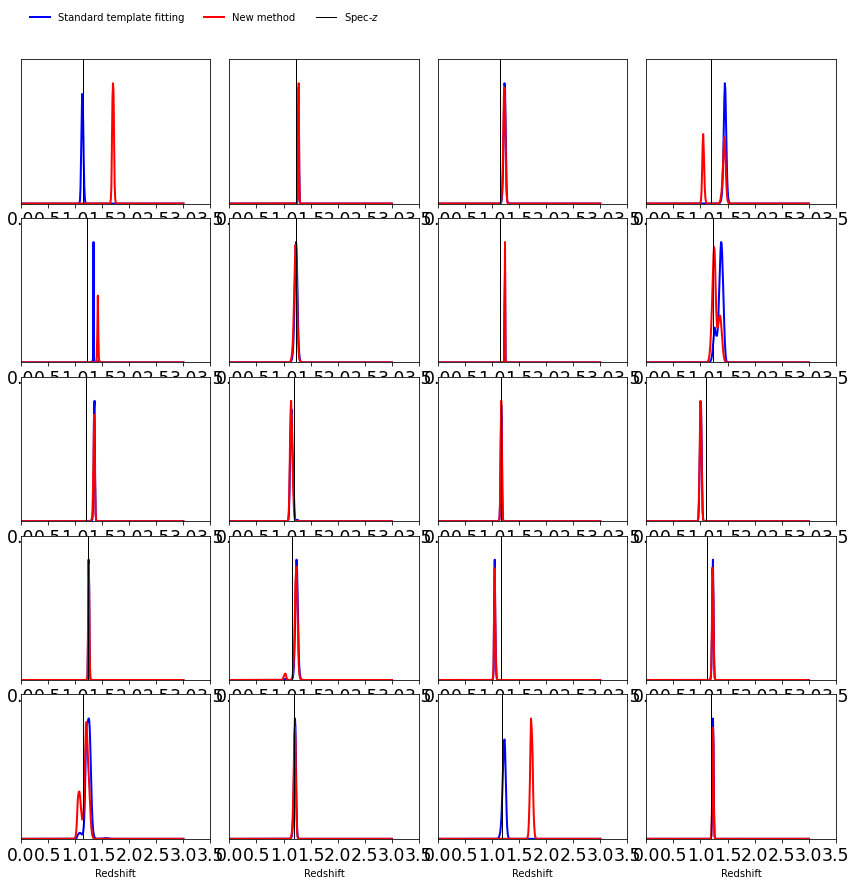

In [21]:
ncol = 4
fig, axs = plt.subplots(5, ncol, figsize=(12, 12), sharex=False, sharey=False)
axs = axs.ravel()
z = fluxredshifts[:, redshiftColumn]
sel = np.random.choice(nobj, axs.size, replace=False)
lw = 2
for ik in range(axs.size):
    k = sel[ik]
    print(k, end=" ")
    axs[ik].plot(redshiftGrid, pdfs_cww[k, :],lw=lw,color='b' ,label='Standard template fitting')# c="#2ecc71", 
    axs[ik].plot(redshiftGrid, pdfs[k, :], lw=lw, color="r",label='New method')  #, c="#3498db"
    axs[ik].axvline(fluxredshifts[k, redshiftColumn], c="k", lw=1, label=r'Spec-$z$')
    ymax = np.max(np.concatenate((pdfs[k, :], pdfs_cww[k, :])))
    axs[ik].set_ylim([0, ymax*1.2])
    axs[ik].set_xlim([0, 3.1])
    axs[ik].set_yticks([])
    axs[ik].set_xticks([0.0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
for i in range(ncol):
    axs[-i-1].set_xlabel('Redshift', fontsize=10)
axs[0].legend(ncol=3, frameon=False, loc='upper left', bbox_to_anchor=(0.0, 1.4))
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.96)

## decode all the info from config files

- most info is similar in all config files except paths

# Output

## Read all output files

In [22]:
all_metricscww = []
all_metrics = []
all_pdfatZ_cww = []
all_pdfatZ = []
for idx in np.arange(0,Nconfigfilenum):
    
    # config file
    configdatafilename=configFileList[idx]
    
    params = parseParamFile(configdatafilename, verbose=False)
    
    DL = approx_DL()
    redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
    
    
    # Load the metrics files
    metricscww = np.loadtxt(params['metricsFile'])
    metrics = np.loadtxt(params['metricsFileTemp'])
    
    all_metricscww.append(metricscww)
    all_metrics.append(metrics)
    
    # Those of the indices of the true, mean, stdev, map, and map_std redshifts.
    i_zt, i_zm, i_std_zm, i_zmap, i_std_zmap = 0, 1, 2, 3, 4
    i_ze = i_zm
    i_std_ze = i_std_zm

    # load the pdf files
    pdfs = np.loadtxt(params['redshiftpdfFile'])
    pdfs_cww = np.loadtxt(params['redshiftpdfFileTemp'])
    pdfatZ_cww = metricscww[:, 5] / pdfs_cww.max(axis=1)
    pdfatZ = metrics[:, 5] / pdfs.max(axis=1)
    nobj = pdfatZ.size
    #pdfs /= pdfs.max(axis=1)[:, None]
    #pdfs_cww /= pdfs_cww.max(axis=1)[:, None]
    pdfs /= np.trapz(pdfs, x=redshiftGrid, axis=1)[:, None]
    pdfs_cww /= np.trapz(pdfs_cww, x=redshiftGrid, axis=1)[:, None]
    
    all_pdfatZ_cww.append( pdfatZ_cww)
    all_pdfatZ.append(pdfatZ)
    

## Stack the results

In [23]:
metricscww_stack=np.vstack(all_metricscww)
metrics_stack=np.vstack(all_metrics)

In [24]:
pdfatZ_cww_stack=np.concatenate(all_pdfatZ_cww)
pdfatZ_stack=np.concatenate(all_pdfatZ)

### Plot point estimation

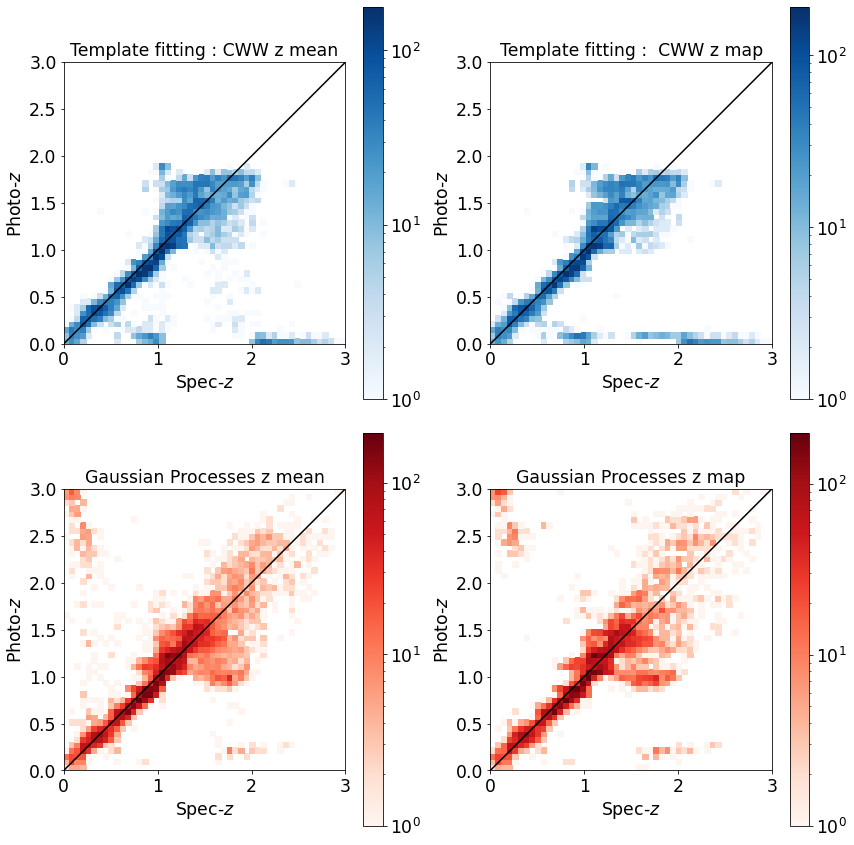

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
zmax = 3
rr = [[0, zmax], [0, zmax]]
nbins = 50
h = axs[0, 0].hist2d(metricscww_stack[:, i_zt], metricscww_stack[:, i_zm], nbins, cmap='Blues', range=rr,norm=LogNorm())
hmin, hmax = np.min(h[0]), np.max(h[0])
axs[0, 0].set_title('Template fitting : CWW z mean')
h2=axs[0, 1].hist2d(metricscww_stack[:, i_zt], metricscww_stack[:, i_zmap], nbins, cmap='Blues', range=rr,  norm=LogNorm())
axs[0, 1].set_title('Template fitting :  CWW z map')
h3=axs[1, 0].hist2d(metrics_stack[:, i_zt], metrics_stack[:, i_zm], nbins, cmap='Reds', range=rr,norm=LogNorm())
axs[1, 0].set_title('Gaussian Processes z mean')
h4=axs[1, 1].hist2d(metrics_stack[:, i_zt], metrics_stack[:, i_zmap], nbins, cmap='Reds', range=rr,norm=LogNorm())
axs[1, 1].set_title('Gaussian Processes z map')
axs[0, 0].plot([0, zmax], [0, zmax], c='k')
axs[0, 1].plot([0, zmax], [0, zmax], c='k')
axs[1, 0].plot([0, zmax], [0, zmax], c='k')
axs[1, 1].plot([0, zmax], [0, zmax], c='k')

fig.colorbar(h[3], ax=axs[0,0])
fig.colorbar(h2[3], ax=axs[0,1])
fig.colorbar(h3[3], ax=axs[1,0])
fig.colorbar(h4[3], ax=axs[1,1])


axs[0,0].set_xlabel('Spec-$z$')
axs[0,1].set_xlabel('Spec-$z$')
axs[1,0].set_xlabel('Spec-$z$')
axs[1,1].set_xlabel('Spec-$z$')

axs[0,0].set_ylabel('Photo-$z$')
axs[0,1].set_ylabel('Photo-$z$')
axs[1,0].set_ylabel('Photo-$z$')
axs[1,1].set_ylabel('Photo-$z$')

axs[0,0].set_aspect('equal')
axs[1,0].set_aspect('equal')
axs[0,1].set_aspect('equal')
axs[1,1].set_aspect('equal')


fig.tight_layout()


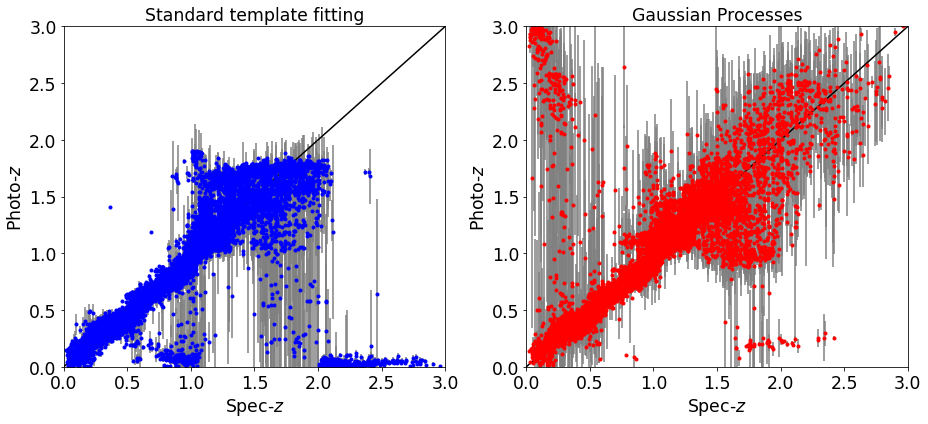

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
chi2s = ((metrics[:, i_zt] - metrics[:, i_ze])/metrics[:, i_std_ze])**2

axs[1].errorbar(metrics_stack[:, i_zt], metrics_stack[:, i_ze], yerr=metrics_stack[:, i_std_ze], fmt='o', markersize=3, color="r",ecolor='grey',capsize=0)
axs[0].errorbar(metricscww_stack[:, i_zt], metricscww_stack[:, i_ze], yerr=metricscww_stack[:, i_std_ze], fmt='o',color="b" ,ecolor='grey',markersize=3, capsize=0)
axs[0].plot([0, zmax], [0, zmax], 'k')
axs[1].plot([0, zmax], [0, zmax], 'k')
axs[0].set_xlim([0, zmax])
axs[1].set_xlim([0, zmax])
axs[0].set_ylim([0, zmax])
axs[1].set_ylim([0, zmax])
axs[1].set_title('Gaussian Processes')
axs[0].set_title('Standard template fitting')

axs[0].set_xlabel('Spec-$z$')
axs[0].set_ylabel('Photo-$z$')
axs[1].set_xlabel('Spec-$z$')
axs[1].set_ylabel('Photo-$z$')

fig.tight_layout()

Text(0.5, 1.0, 'Gaussian Processes')

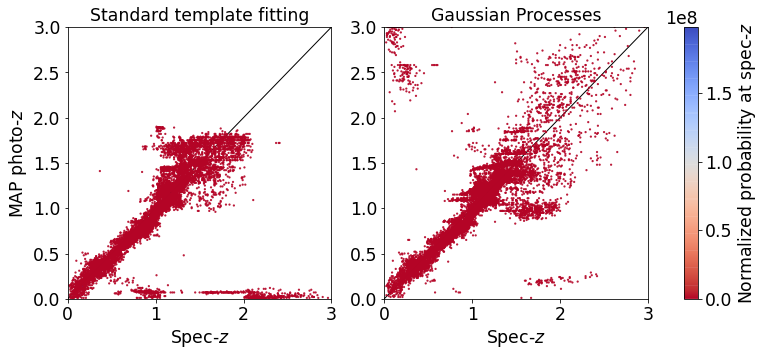

In [27]:
cmap = "coolwarm_r"
vmin = 0.0
alpha = 0.9
s = 5
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
vs = axs[0].scatter(metricscww_stack[:, i_zt], metricscww_stack[:, i_zmap], 
                    s=s, c=pdfatZ_cww_stack, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
vs = axs[1].scatter(metrics_stack[:, i_zt], metrics_stack[:, i_zmap], 
                    s=s, c=pdfatZ_stack, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
clb = plt.colorbar(vs, ax=axs.ravel().tolist())
clb.set_label('Normalized probability at spec-$z$')
for i in range(2):
    axs[i].plot([0, zmax], [0, zmax], c='k', lw=1, zorder=0, alpha=1)
    axs[i].set_ylim([0, zmax])
    axs[i].set_xlim([0, zmax])
    axs[i].set_xlabel('Spec-$z$')
axs[0].set_ylabel('MAP photo-$z$')

axs[0].set_title('Standard template fitting')
axs[1].set_title('Gaussian Processes')